In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [43]:
def clean_data(df):
    years = [str(year) for year in range(1960,2000)]
    years.extend(['Unnamed: 63','Indicator Code','Indicator Name'])
    df.head()
    df = df.drop(columns=years)
    df = df.drop(index = df[df.sum(axis=1) == 0].index)
    df['Average %'] = df.mean(axis=1)
    cols = df.columns.tolist()
    cols = cols[0:2] + cols[-1:] + cols[2:-1]
    df = df[cols]
    return df

def create_data(file_loc):
    df = pd.read_csv(file_loc)
    df = clean_data(df)
    return df

In [29]:
PrimaryCompletion = pd.read_csv('Data/Primary_Completion_Rate.csv')

In [33]:
PrimaryCompletion = clean_data(PrimaryCompletion)

In [39]:
PrimaryCompletion.shape

(228, 22)

In [38]:
ChildEmploymentF = pd.read_csv('Data/Child_Employment_Female.csv')
ChildEmploymentF = clean_data(ChildEmploymentF)
ChildEmploymentF.shape

(97, 22)

In [40]:
ChildEmploymentM = pd.read_csv('Data/Child_Employment_Male.csv')
ChildEmploymentM = clean_data(ChildEmploymentM)
ChildEmploymentM.shape

(97, 22)

In [49]:
GovExpend = create_data('Data/Government_Expenditure.csv')
GovExpend.shape

(209, 22)

In [47]:
PopDense = create_data('Data/Population_Density.csv')
PopDense.shape

(261, 22)

In [48]:
UrbanPop = create_data('Data/Urban_Population.csv')
UrbanPop.shape

(261, 22)

In [197]:
AgriLand = create_data('Data/Agricultural_Land.csv')
AgriLand.shape

(255, 22)

In [225]:
Metadata = pd.read_csv('Data/Country_Metadata.csv')
Metadata = Metadata[['TableName','Country Code','Region','IncomeGroup']]
Metadata.head()

,TableName,Country Code,Region,IncomeGroup
0,Aruba,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,South Asia,Low income
2,Angola,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income


In [226]:
Metadata = pd.concat([Metadata,pd.get_dummies(Metadata['IncomeGroup']),pd.get_dummies(Metadata['Region'])],1)
Metadata.head()

,TableName,Country Code,Region,IncomeGroup,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,ABW,Latin America & Caribbean,High income,1,0,0,0,0,0,1,0,0,0,0
1,Afghanistan,AFG,South Asia,Low income,0,1,0,0,0,0,0,0,0,1,0
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,0,0,1,0,0,0,0,0,0,0,1
3,Albania,ALB,Europe & Central Asia,Upper middle income,0,0,0,1,0,1,0,0,0,0,0
4,Andorra,AND,Europe & Central Asia,High income,1,0,0,0,0,1,0,0,0,0,0


In [246]:
dataframes = [PrimaryCompletion,ChildEmploymentF,ChildEmploymentM,GovExpend,PopDense,UrbanPop,AgriLand,Metadata]

In [199]:
# PrimaryCompletion.rename(columns={'Average %':'Average Primary School Completion'},inplace=True)
# ChildEmploymentF.rename(columns={'Average %':'Average Female Children Employment'},inplace=True)
# ChildEmploymentM.rename(columns={'Average %':'Average Male Children Employment'},inplace=True)
# GovExpend.rename(columns={'Average %':'Average GDP Spent on Education'},inplace=True)
# PopDense.rename(columns={'Average %':'Average Population'},inplace=True)
# UrbanPop.rename(columns={'Average %':'Average Urban Population'},inplace=True)
# AgriLand.rename(columns={'Average %':'Agricultural Land'},inplace=True)

In [159]:
maindf = pd.merge(left=PrimaryCompletion[['Country Name','Average Primary School Completion']],right=ChildEmploymentF[['Country Name','Average Female Children Employment']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=ChildEmploymentM[['Country Name','Average Male Children Employment']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=GovExpend[['Country Name','Average GDP Spent on Education']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=PopDense[['Country Name','Average Population']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=UrbanPop[['Country Name','Average Urban Population']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=AgriLand[['Country Name','Agricultural Land']],how='outer',left_on='Country Name',right_on='Country Name')
maindf = pd.merge(left=maindf,right=Metadata,how='outer',left_on='Country Name',right_on='TableName')

In [247]:
pickle.dump(maindf,open('Data/cleaned_data.pickle','wb'),pickle.HIGHEST_PROTOCOL)

In [248]:
pickle.load(open('Data/cleaned_data.pickle','rb'))

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,Region,IncomeGroup,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,Latin America & Caribbean,High income,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,Sub-Saharan Africa,Lower middle income,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,Middle East & North Africa,High income,...,0,0,0,0,0,0,1,0,0,0
5,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,Latin America & Caribbean,Upper middle income,...,0,0,1,0,0,1,0,0,0,0
6,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0
7,Antigua and Barbuda,88.527339,NaN,NaN,8.693380,196.539474,27.498158,20.454545,Latin America & Caribbean,High income,...,0,0,0,0,0,1,0,0,0,0
8,Austria,98.512104,NaN,NaN,22.971336,101.440646,58.318316,34.010416,Europe & Central Asia,High income,...,0,0,0,0,1,0,0,0,0,0
9,Azerbaijan,95.473141,5.915139,8.907135,NaN,108.079907,53.322947,57.590232,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0


In [250]:
maindf.head()

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,Region,IncomeGroup,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,Latin America & Caribbean,High income,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.10000,30.000000,NaN,18.382628,58.639895,46.671448,Sub-Saharan Africa,Lower middle income,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.41444,24.173033,29.845680,107.789280,51.027526,42.261679,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,Middle East & North Africa,High income,...,0,0,0,0,0,0,1,0,0,0


In [231]:
# maindf = pd.concat([maindf,pd.get_dummies(maindf['IncomeGroup']),pd.get_dummies(maindf['Region'])],1)
# maindf.head()

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,Region,IncomeGroup,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,Latin America & Caribbean,High income,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.10000,30.000000,NaN,18.382628,58.639895,46.671448,Sub-Saharan Africa,Lower middle income,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.41444,24.173033,29.845680,107.789280,51.027526,42.261679,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,Middle East & North Africa,High income,...,0,0,0,0,0,0,1,0,0,0


In [251]:
corr = maindf.corr()
corr

,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Average Primary School Completion,1.000000,-0.701899,-0.721385,0.356563,0.088956,0.493021,-0.180186,0.338139,-0.598385,-0.130791,0.290334,0.197953,0.297284,0.181709,0.060315,0.042721,0.039244,-0.632692
Average Female Children Employment,-0.701899,1.000000,0.972025,-0.236341,-0.144484,-0.520244,-0.020312,-0.240812,0.630692,-0.096099,-0.445536,-0.079366,-0.234984,-0.371560,-0.270280,NaN,-0.080940,0.712133
Average Male Children Employment,-0.721385,0.972025,1.000000,-0.211282,-0.129536,-0.517523,0.002575,-0.251022,0.617178,-0.090206,-0.431321,-0.121990,-0.250744,-0.307391,-0.275345,NaN,-0.093613,0.705076
Average GDP Spent on Education,0.356563,-0.236341,-0.211282,1.000000,-0.140624,0.286378,0.091337,0.199007,-0.261544,-0.010818,0.071315,-0.068088,0.409848,-0.014609,0.055276,0.025112,-0.139303,-0.249236
Average Population,0.088956,-0.144484,-0.129536,-0.140624,1.000000,0.236032,-0.134012,0.212362,-0.052487,-0.057082,-0.067623,0.161924,0.042662,-0.041229,-0.016444,0.004005,0.010453,-0.067938
Average Urban Population,0.493021,-0.520244,-0.517523,0.286378,0.236032,1.000000,-0.208662,0.517909,-0.409077,-0.284322,0.079960,0.016626,0.206334,0.132853,0.227112,0.139898,-0.225184,-0.380415
Agricultural Land,-0.180186,-0.020312,0.002575,0.091337,-0.134012,-0.208662,1.000000,-0.264439,0.208906,0.139117,-0.003393,-0.214339,0.143755,-0.134895,-0.061897,-0.098693,0.050886,0.210407
High income,0.338139,-0.240812,-0.251022,0.199007,0.212362,0.517909,-0.264439,1.000000,-0.232994,-0.295012,-0.353012,0.056266,0.397524,0.088129,0.054417,0.165429,-0.115010,-0.277045
Low income,-0.598385,0.630692,0.617178,-0.261544,-0.052487,-0.409077,0.208906,-0.232994,1.000000,-0.163027,-0.195079,-0.142896,-0.162013,-0.121233,-0.017449,-0.038544,0.075738,0.590440
Lower middle income,-0.130791,-0.096099,-0.090206,-0.010818,-0.057082,-0.284322,0.139117,-0.295012,-0.163027,1.000000,-0.247005,0.200924,-0.144259,-0.083921,0.052402,-0.048804,0.154688,0.189478


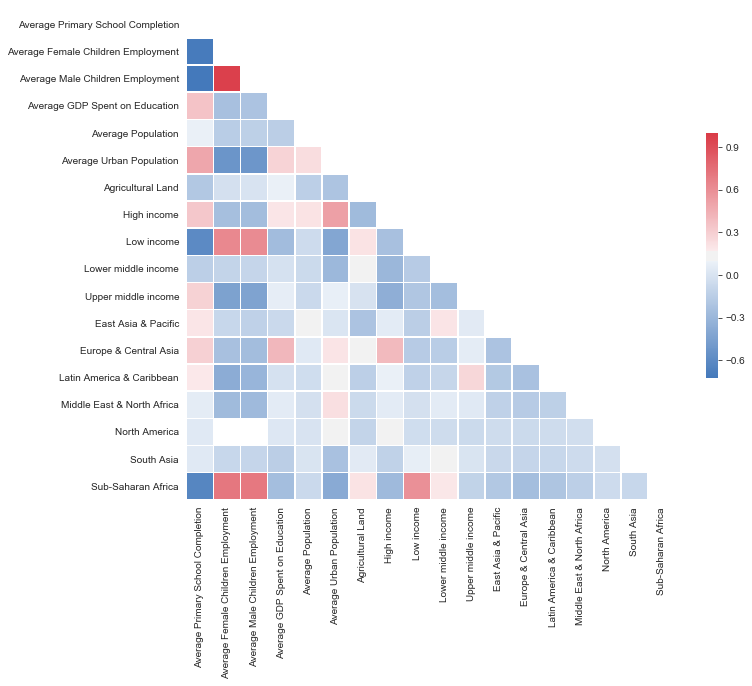

In [245]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

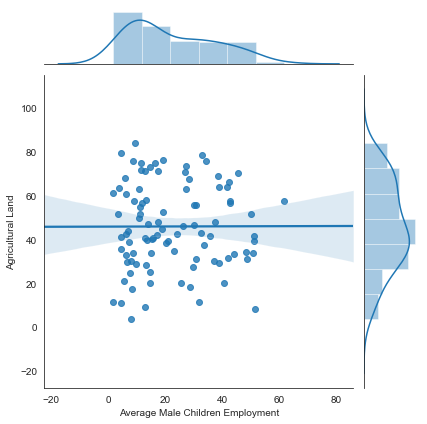

In [210]:
sns.jointplot(x='Average Male Children Employment',y='Agricultural Land',kind='reg',data=maindf)
# sns.distplot(maindf['Average Male Children Employment'].dropna())
# sns.distplot(maindf['Agricultural Land'].dropna())

In [252]:
maindf.count()

Country Name                          263
Average Primary School Completion     228
Average Female Children Employment     97
Average Male Children Employment       97
Average GDP Spent on Education        209
Average Population                    261
Average Urban Population              261
Agricultural Land                     255
Region                                213
IncomeGroup                           213
High income                           263
Low income                            263
Lower middle income                   263
Upper middle income                   263
East Asia & Pacific                   263
Europe & Central Asia                 263
Latin America & Caribbean             263
Middle East & North Africa            263
North America                         263
South Asia                            263
Sub-Saharan Africa                    263
dtype: int64

In [213]:
maindf[maindf['Average Primary School Completion'] == maindf['Average Primary School Completion'].max()]

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land
128,Maldives,138.221984,NaN,NaN,15.226381,1243.781053,35.196632,29.470588
